(3713, 1)
(1592, 1)


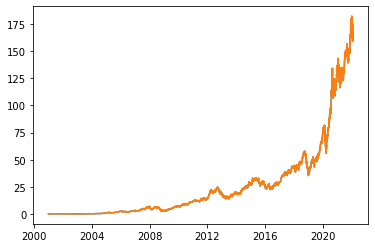

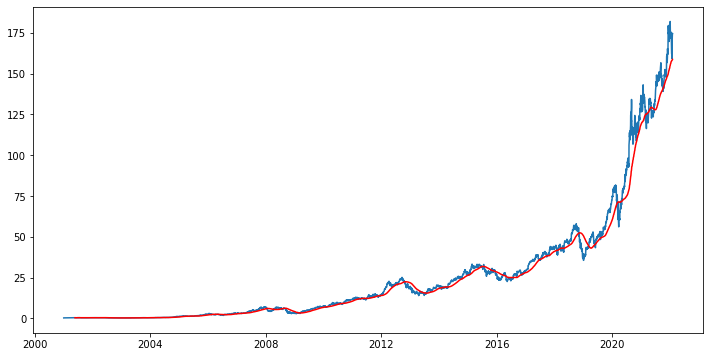

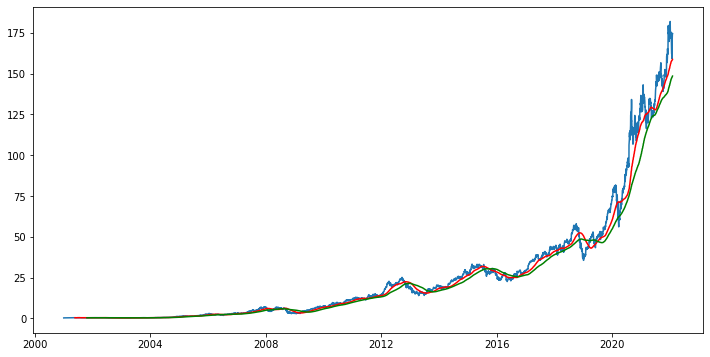

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
start='2001-01-01'
end='2022-02-01'
df= data.DataReader('AAPL','yahoo',start,end)
df.head()
df.tail()
plt.plot(df.Close)
plt.plot(df.Close)
ma100=df.Close.rolling(100).mean()
ma100
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
ma200=df.Close.rolling(200).mean()
ma200
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
data_training=pd.DataFrame(df['Close'][0:int(len(df)*.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_training_array= scaler.fit_transform(data_training)
data_training_array
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential


In [4]:
import tensorflow.keras.models
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(units = 50, activation='relu', return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(tensorflow.keras.layers.Dropout(0.2))
model.add(tensorflow.keras.layers.LSTM(units = 60, activation='relu', return_sequences= True))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.LSTM(units = 80, activation='relu', return_sequences= True))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.LSTM(units = 120, activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.5))
model.add(tensorflow.keras.layers.Dense(units=1))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [6]:
model.compile(optimizer='adam',loss= 'mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
113/113 [==============================] - 63s 460ms/step - loss: 0.0167
Epoch 2/50
113/113 [==============================] - 48s 428ms/step - loss: 0.0046
Epoch 3/50
113/113 [==============================] - 50s 440ms/step - loss: 0.0041
Epoch 4/50
113/113 [==============================] - 49s 431ms/step - loss: 0.0048
Epoch 5/50
113/113 [==============================] - 50s 439ms/step - loss: 0.0041
Epoch 6/50
113/113 [==============================] - 45s 400ms/step - loss: 0.0042
Epoch 7/50
113/113 [==============================] - 45s 397ms/step - loss: 0.0042
Epoch 8/50
113/113 [==============================] - 40s 352ms/step - loss: 0.0043
Epoch 9/50
113/113 [==============================] - 48s 426ms/step - loss: 0.0040
Epoch 10/50
113/113 [==============================] - 50s 445ms/step - loss: 0.0035
Epoch 11/50
113/113 [==============================] - 51s 448ms/step - loss: 0.0033
Epoch 12/50
113/113 [==============================] - 39s 348ms/step - lo

In [7]:
model.save('keras_model.h5')

In [8]:
past_100_days=data_training.tail(100)


In [9]:
final_df=past_100_days.append(data_testing,ignore_index=True)

In [10]:
final_df.head()

,Close
0,32.192501
1,32.547501
2,32.517502
3,32.514999
4,32.847500


In [11]:
input_data=scaler.fit_transform(final_df)

In [12]:
 input_data.shape

(1692, 1)

In [18]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [20]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1592, 100, 1)
(1592,)


In [21]:
y_pred=model.predict(x_test)

In [23]:
y_pred.shape

(1592, 1)

In [24]:
y_test

array([0.03205269, 0.03004548, 0.034154  , ..., 0.92673675, 0.95464955,
       0.95358323])

In [25]:
y_pred

array([[0.05706146],
       [0.05696744],
       [0.05685078],
       ...,
       [0.9180033 ],
       [0.9112966 ],
       [0.90706724]], dtype=float32)

In [26]:
scaler.scale_


array([0.00627254])

In [27]:
scale_factor=1/0.00627254
y_pred=y_pred*scale_factor
y_test=y_test*scale_factor

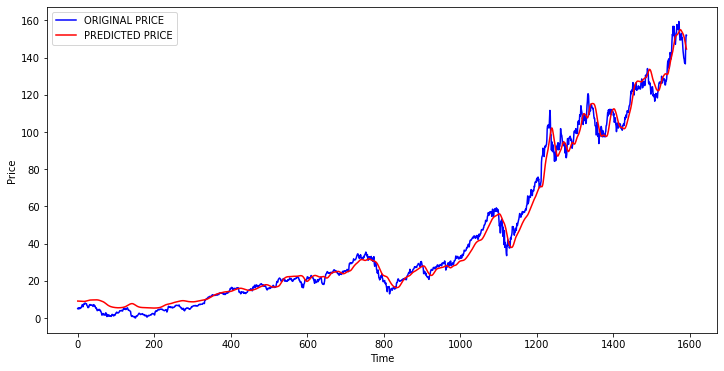

In [28]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='ORIGINAL PRICE')
plt.plot(y_pred,'r',label='PREDICTED PRICE')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()